In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

In [2]:
df = sns.load_dataset("iris")
df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

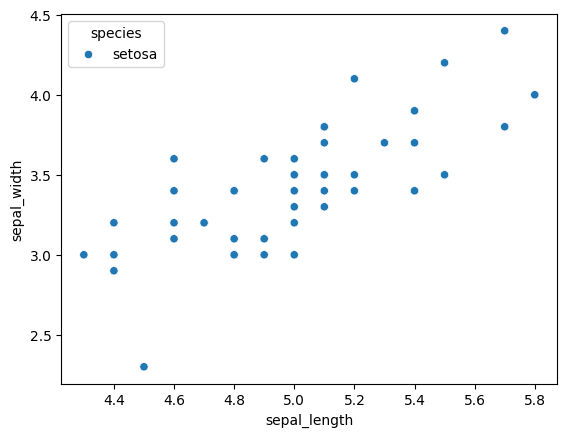

In [29]:
sns.scatterplot(x='sepal_length', y="sepal_width", data = df[df['species'] == "setosa"], hue="species")

In [25]:
df['species'] == "setosa"

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

In [30]:
titanic = sns.load_dataset("titanic")

In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='survived'>

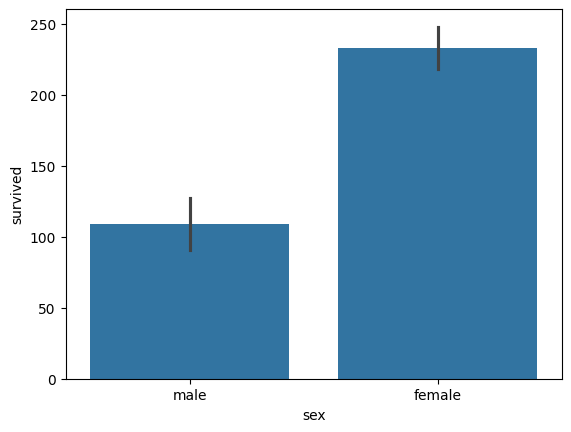

In [35]:
sns.barplot(x="sex", y="survived", data=titanic, estimator=sum)

<Axes: xlabel='sex', ylabel='survived'>

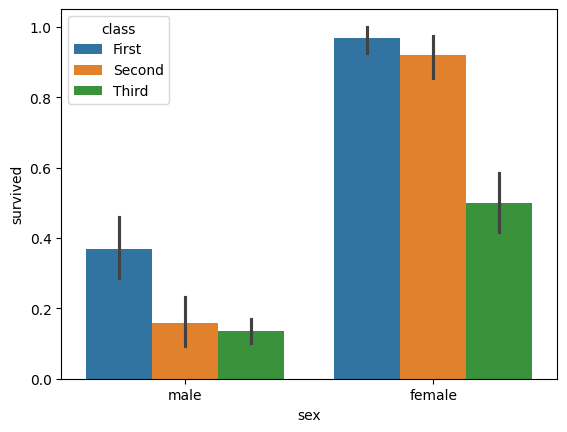

In [36]:
sns.barplot(x='sex', y='survived', hue='class', data=titanic)

In [38]:
grouped_titanic = titanic.groupby(['class', 'sex'])['survived'].agg('sum')

In [39]:
sex = np.unique(titanic['sex'])

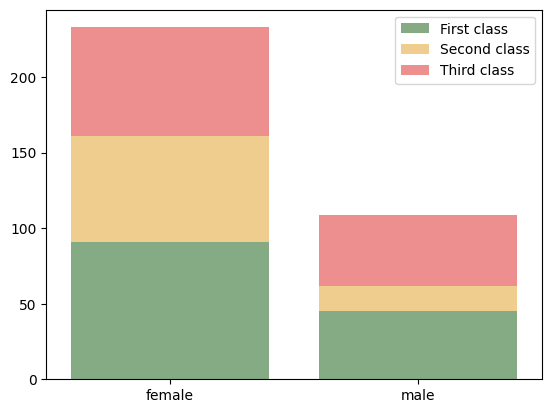

In [45]:
sns.barplot(x=sex, y=grouped_titanic['First'].values, label='First class',
           color='darkgreen', alpha=0.5)
sns.barplot(x=sex, y=grouped_titanic['Second'].values, bottom=grouped_titanic['First'].values, label='Second class',
           color='orange', alpha=0.5)
sns.barplot(x=sex, y=grouped_titanic['Third'].values, bottom=grouped_titanic['First'].values + grouped_titanic['Second'].values, label='Third class',
           color='red', alpha=0.5)
plt.legend()
plt.show()

In [46]:
df = sns.load_dataset('iris')

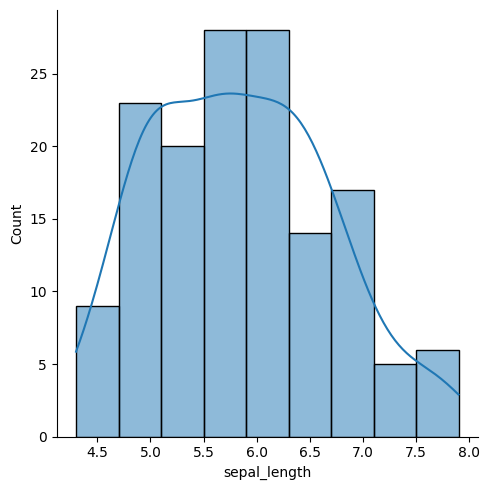

C:\Users\AmanP\AppData\Local\Temp\ipykernel_51228\3515670564.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal_length'], kde=False)


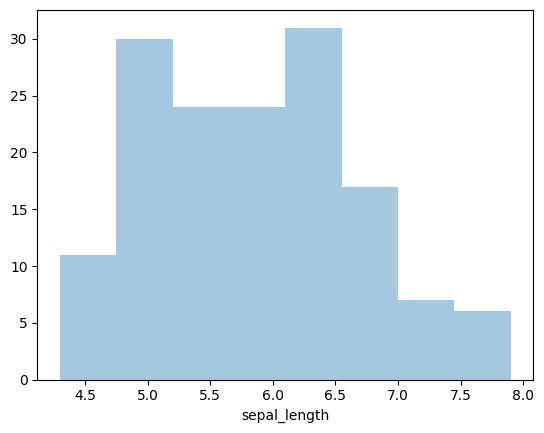

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

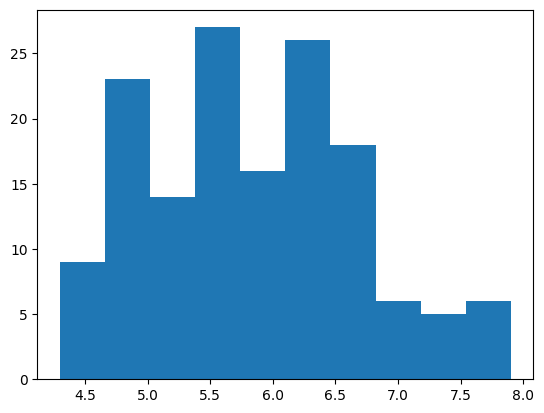

In [51]:
sns.displot(df['sepal_length'], kind='hist', kde=True)
plt.show()
sns.distplot(df['sepal_length'], kde=False)
plt.show()

plt.hist(df["sepal_length"], bins=10)

C:\Users\AmanP\AppData\Local\Temp\ipykernel_51228\2502788943.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.05`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(df['sepal_width'], shade = True, bw=.05, color='olive')
C:\Users\AmanP\AppData\Local\Temp\ipykernel_51228\2502788943.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sepal_width'], shade = True, bw=.05, color='olive')
C:\Users\AmanP\AppData\Local\Temp\ipykernel_51228\2502788943.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(df['sepal_width'], shade = T

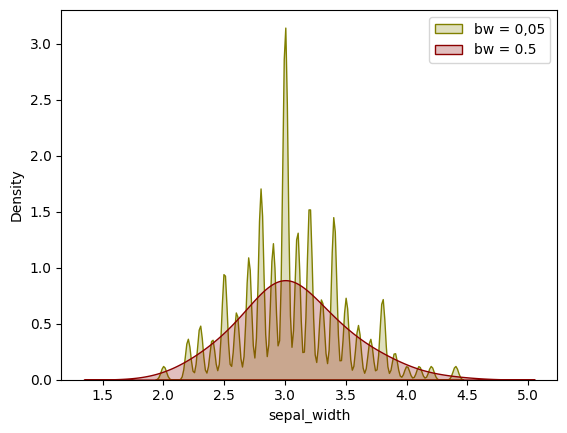

In [52]:
sns.kdeplot(df['sepal_width'], shade = True, bw=.05, color='olive')
sns.kdeplot(df['sepal_width'], shade = True, bw=.5, color='darkred')
plt.legend(['bw = 0,05', 'bw = 0.5'])
plt.show()

<Figure size 1800x1000 with 0 Axes>

<Figure size 800x640 with 0 Axes>

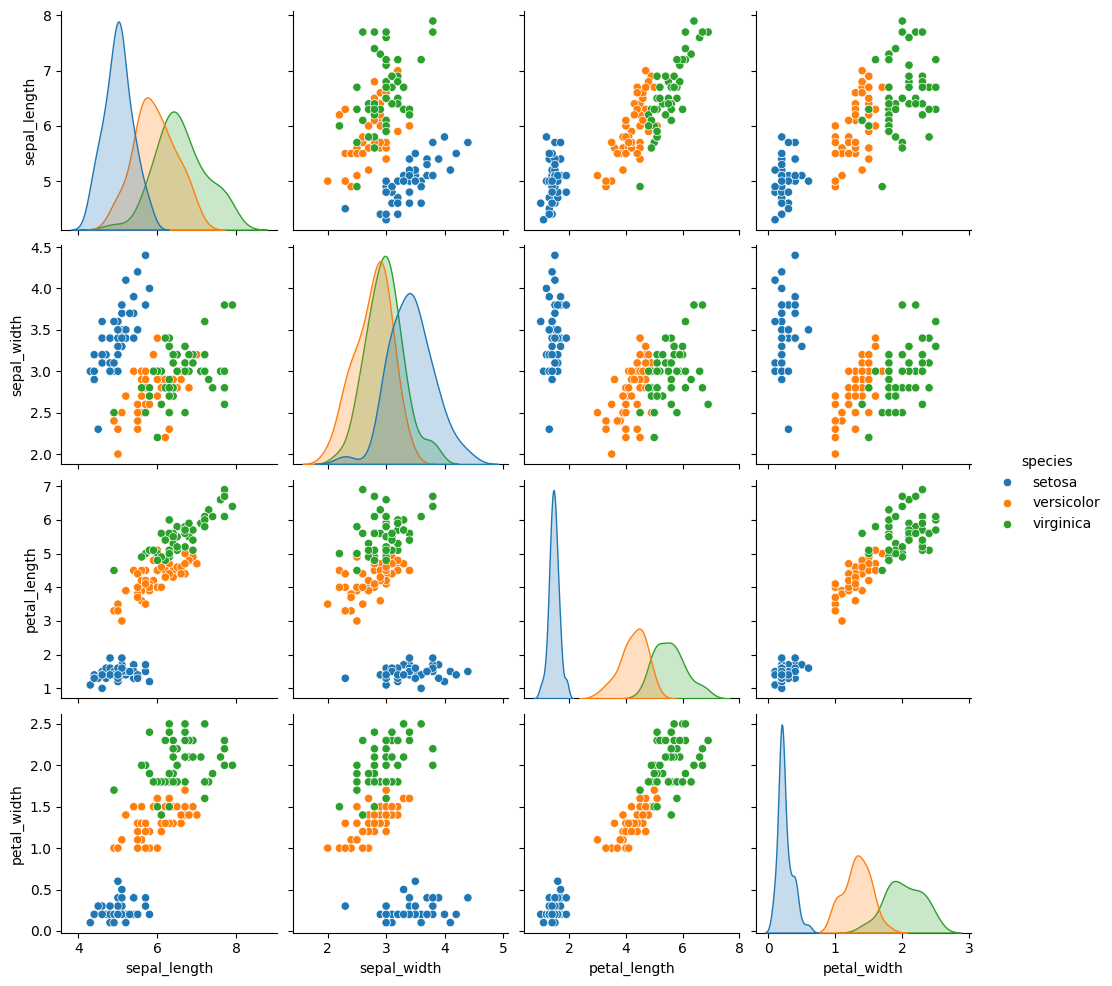

In [53]:
plt.figure(figsize=(18, 10))

plt.figure(figsize=(10, 8), dpi=80)

sns.pairplot(df, kind='scatter', hue='species')
plt.show()

C:\Users\AmanP\AppData\Local\Temp\ipykernel_51228\3015272515.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['species'], y=df['sepal_length'], palette='Blues')


<Axes: xlabel='species', ylabel='sepal_length'>

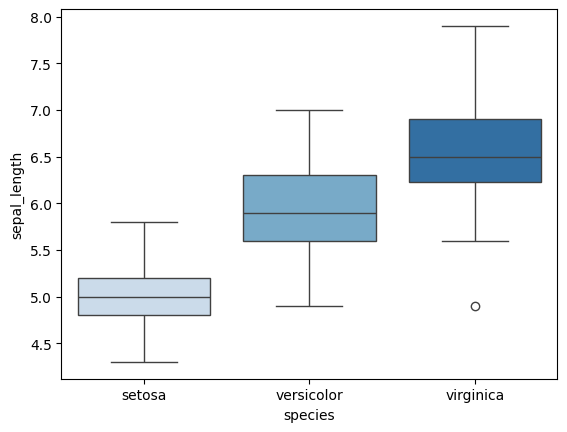

In [54]:
sns.boxplot(x=df['species'], y=df['sepal_length'], palette='Blues')

C:\Users\AmanP\AppData\Local\Temp\ipykernel_51228\45099045.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df['species'], x=df['sepal_length'], palette='Set2')


<Axes: xlabel='sepal_length', ylabel='species'>

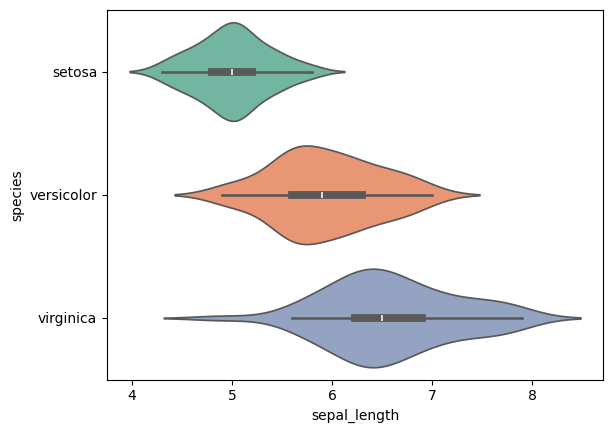

In [55]:
sns.violinplot(y=df['species'], x=df['sepal_length'], palette='Set2')

In [59]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')